## Serie temporal para los precios

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
import plotly_express as px
import plotly.graph_objects as go

In [2]:
videogames_data = pd.read_csv('data/videogames_eda.csv')

In [4]:
videogames_data.dtypes

appid                int64
name                object
developer           object
publisher           object
positive             int64
negative             int64
owners              object
average_forever      int64
median_forever       int64
price              float64
initialprice       float64
languages            int64
release_date        object
owners_min           int64
owners_max           int64
owners_min_text     object
owners_max_text     object
release_year         int64
price_category      object
total_reviews        int64
dtype: object

In [5]:
# Hemos visto que los inferiores a 2000 dan problemas.
videogames_data = videogames_data.loc[videogames_data['release_year'] >= 2000]

In [6]:
# Convertirmos la columna 'release_year' a un objeto de fecha y hora
videogames_data['release_year'] = pd.to_datetime(videogames_data['release_year'], format='%Y')

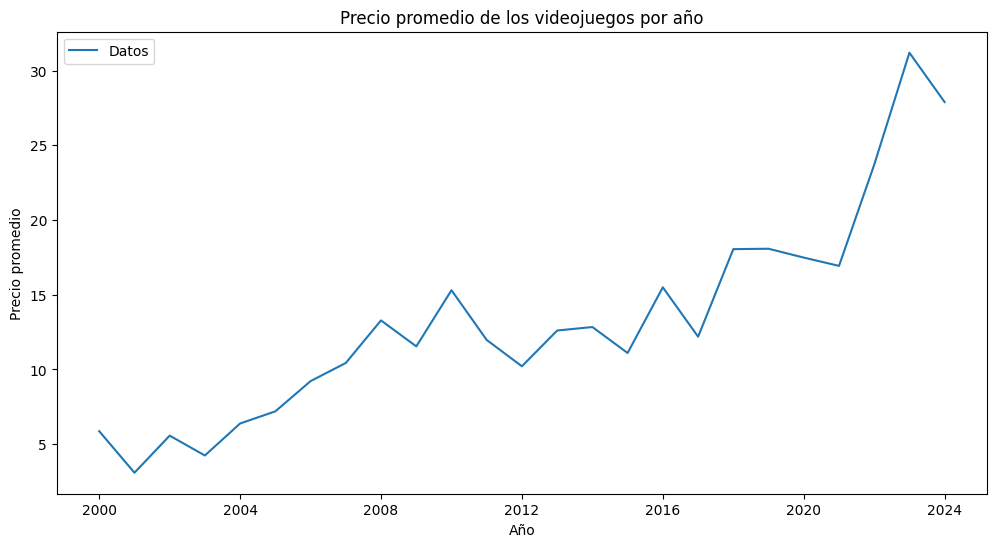

In [7]:
# Agrupar los datos por año y calcular la media de los precios
precio_anual = videogames_data.groupby('release_year')['price'].mean()


# Graficar los datos originales y la predicción
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(precio_anual.index, precio_anual, label='Datos')
ax.legend()
ax.set_title('Precio promedio de los videojuegos por año')
ax.set_xlabel('Año')
ax.set_ylabel('Precio promedio')
plt.show()

In [8]:
import plotly.graph_objects as go
import pandas as pd

# Agrupar los datos por año y calcular la media de los precios
precio_anual = videogames_data.groupby('release_year')['price'].mean()

# Crear el gráfico con Plotly
fig = go.Figure()

fig.add_trace(go.Scatter(x=precio_anual.index, y=precio_anual, mode='lines', name='Datos'))

fig.update_layout(title='Precio promedio de los videojuegos por año',
                  xaxis_title='Año',
                  yaxis_title='Precio promedio',
                  template='plotly_dark')

fig.show()

# Exportar el gráfico como HTML
# fig.write_html("graphs/precio_promedio_videojuegos.html")

In [23]:
precio_anual = videogames_data.groupby('release_year')['price'].mean()

fig = go.Figure()
fig.add_trace(go.Scatter(x=precio_anual.index, y=precio_anual, mode='lines'))

# Ajustar márgenes y fondo
fig.update_layout(
    font_color="white",                   
    title='Precio promedio de los videojuegos por año',
    xaxis_title='Año',
    yaxis_title='Precio promedio',
    template='plotly_dark'
)


fig.show()
# Guardar el gráfico como archivo HTML
fig.write_html("graphs/tu_gráfico.html")


### Revisamos si es estacionaria

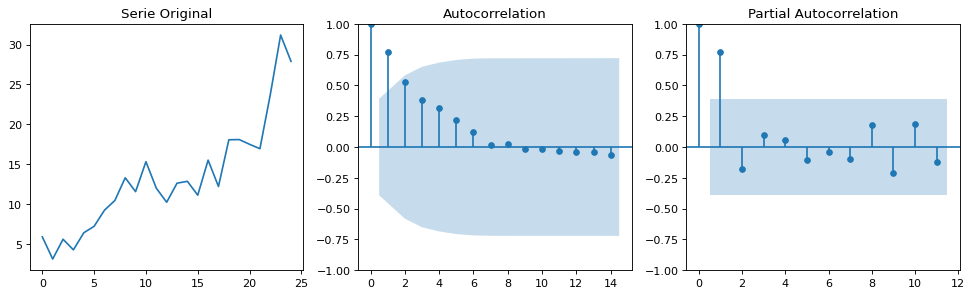

In [7]:
# Crea gráficos para la serie temporal
f = plt.figure(figsize=(15, 4), dpi=80)

# Gráfico de la serie original
ax1 = f.add_subplot(131)
ax1.set_title('Serie Original')
ax1.plot(precio_anual.values)

# Gráfico de la función de autocorrelación
ax2 = f.add_subplot(132)
plot_acf(precio_anual.values, ax=ax2)

# Gráfico de la función de autocorrelación parcial
ax3 = f.add_subplot(133)
plot_pacf(precio_anual.values, ax=ax3, lags=min(11, len(precio_anual.values)//2 - 1))

plt.show()

### Analizamos la serie diferenciada una vez.

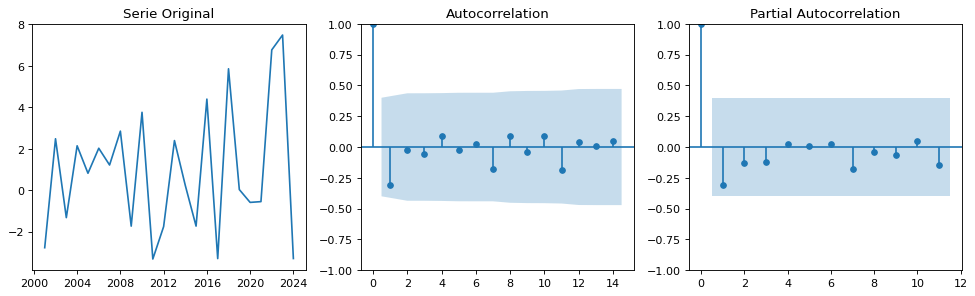

In [8]:
# Crea gráficos para la serie temporal
f = plt.figure(figsize=(15, 4), dpi=80)

# Gráfico de la serie original
ax1 = f.add_subplot(131)
ax1.set_title('Serie Original')
ax1.plot(precio_anual.diff())

# Gráfico de la función de autocorrelación
ax2 = f.add_subplot(132)
plot_acf(precio_anual.diff().dropna(), ax=ax2)

# Gráfico de la función de autocorrelación parcial
ax3 = f.add_subplot(133)
plot_pacf(precio_anual.diff().dropna(), ax=ax3, lags=min(11, len(precio_anual.values)//2 - 1))

plt.show()

### Hacemos prueba Dickey-Fuller

In [9]:
# Prueba
print(f"p-valor diferenciación orden cero: {adfuller(precio_anual)[0]}")
print(f"p-valor diferenciación orden uno: {adfuller(precio_anual.diff().dropna())[1]}")
print(f"p-valor diferenciación orden dos: {adfuller(precio_anual.diff().diff().dropna())[0]}")

p-valor diferenciación orden cero: -0.3389208620337198
p-valor diferenciación orden uno: 1.6791741379510428e-08
p-valor diferenciación orden dos: -3.815625035211489


In [12]:
import warnings
from statsmodels.tsa.arima.model import ARIMA

warnings.filterwarnings("ignore") 

P = range(0, 6)
D = range(0, 3)
Q = range(0, 6)

best_aic = float("inf")
best_params = None

for p in P:
    for d in D:
        for q in Q:
            modelo = ARIMA(precio_anual, order=(p, d, q))
            results = modelo.fit()
            current_aic = results.aic
            if current_aic < best_aic:
                best_aic = current_aic
                best_params = (p, d, q)
            print(f"modelo arima: ({p},{d},{q}) => AIC = {current_aic}")

print(f"\nBest model: ({best_params[0]}, {best_params[1]}, {best_params[2]}) => AIC = {best_aic}")

modelo arima: (0,0,0) => AIC = 170.83885110085268
modelo arima: (0,0,1) => AIC = 156.0175062500804
modelo arima: (0,0,2) => AIC = 148.7614874623596
modelo arima: (0,0,3) => AIC = 144.81471464521778
modelo arima: (0,0,4) => AIC = 146.46221155154853
modelo arima: (0,0,5) => AIC = 147.37466958125398
modelo arima: (0,1,0) => AIC = 126.61411257947363
modelo arima: (0,1,1) => AIC = 127.90763300457238
modelo arima: (0,1,2) => AIC = 129.74108012220012
modelo arima: (0,1,3) => AIC = 131.4182717129664
modelo arima: (0,1,4) => AIC = 132.5430951426654
modelo arima: (0,1,5) => AIC = 134.52907638578205
modelo arima: (0,2,0) => AIC = 141.36144016437785
modelo arima: (0,2,1) => AIC = 125.66324415047079
modelo arima: (0,2,2) => AIC = 125.3366722878069
modelo arima: (0,2,3) => AIC = 127.33306374783928
modelo arima: (0,2,4) => AIC = 129.23351810479795
modelo arima: (0,2,5) => AIC = 130.91043464200368
modelo arima: (1,0,0) => AIC = 137.23594107422178
modelo arima: (1,0,1) => AIC = 138.93652330956007
model

### Modelización

In [13]:
model = ARIMA(precio_anual.values, order=(0,2,2))
model_fit = model.fit()


In [14]:
# Resumen del entrenamiento
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:                 ARIMA(0, 2, 2)   Log Likelihood                 -59.668
Date:                Mon, 12 Feb 2024   AIC                            125.337
Time:                        13:06:54   BIC                            128.743
Sample:                             0   HQIC                           126.193
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.2623      0.229     -5.502      0.000      -1.712      -0.813
ma.L2          0.3657      0.306      1.194      0.232      -0.235       0.966
sigma2         9.5300      3.170      3.006      0.0

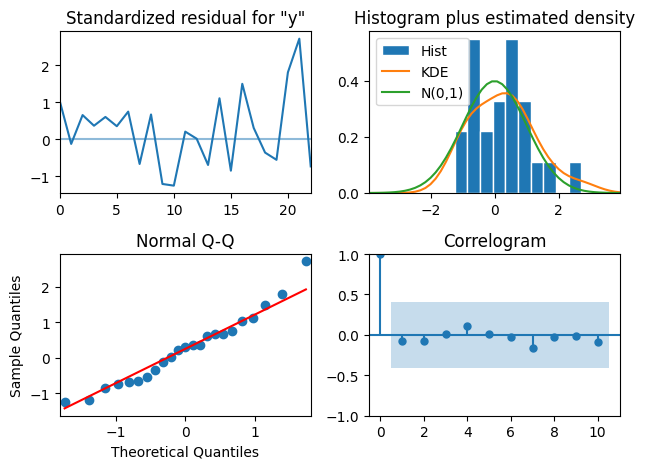

In [15]:
model_fit.plot_diagnostics()
plt.tight_layout()
plt.show()

## Predicción

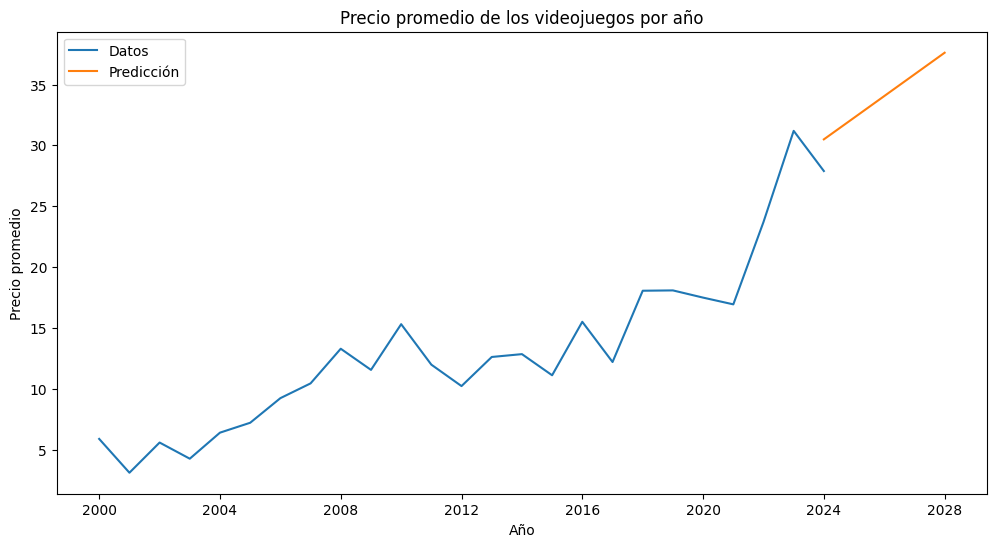

In [16]:
# Agrupar los datos por año y calcular la media de los precios
precio_anual = videogames_data.groupby('release_year')['price'].mean()

# Crear el modelo ARIMA para los datos anuales
modelo = ARIMA(precio_anual, order=(0,2,2))
modelo_fit = modelo.fit()

# Obtener la predicción para los próximos 5 años
prediccion = modelo_fit.predict(start=len(precio_anual), end=len(precio_anual)+4, typ='levels')

# Crear un rango de fechas para la predicción
fechas_pred = pd.date_range(start=str(precio_anual.index[-1]), periods=5, freq='AS')

# Graficar los datos originales y la predicción
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(precio_anual.index, precio_anual, label='Datos')
ax.plot(fechas_pred, prediccion, label='Predicción')
ax.legend()
ax.set_title('Precio promedio de los videojuegos por año')
ax.set_xlabel('Año')
ax.set_ylabel('Precio promedio')
plt.show()

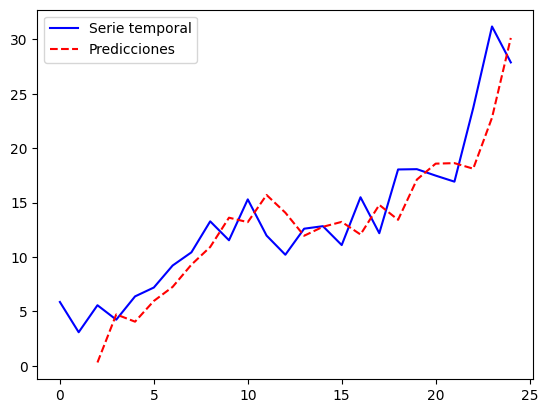

In [34]:
p = 0 # Coeficientes de autoregresión
d = 2 # Orden de diferenciación
q = 2 # Ajuste media móvil
# Ajustamos modelo a datos
model1 = ARIMA(precio_anual.values, order=(p,d,q))
model_fit1 = model1.fit()
# Tomamos predicciones
preds = model_fit1.predict()
# Creamos figura
fig, ax = plt.subplots()
ax.plot(range(len(precio_anual)), precio_anual.values, 'b-')
ax.plot(range(d,len(precio_anual)), preds[d:], 'r--')
plt.legend(['Serie temporal', 'Predicciones'])
plt.show()

Predicho=12.138088, Valor real=15.498313
Predicho=17.139354, Valor real=12.192414
Predicho=13.831749, Valor real=18.051954
Predicho=18.268808, Valor real=18.078788
Predicho=20.096689, Valor real=17.486494
Predicho=19.354366, Valor real=16.931695
Predicho=17.317162, Valor real=23.703469
Predicho=21.632636, Valor real=31.192500
Predicho=32.322278, Valor real=27.890000
Test RMSE: 2.219


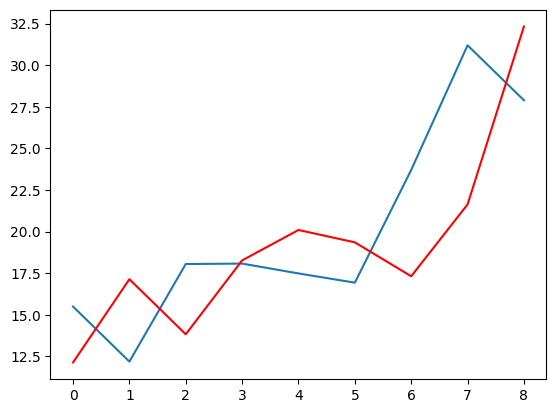

In [18]:
# Partimos datos para asegurar una validación final
# en datos test
X = precio_anual.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# Walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(0,2,2))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('Predicho=%f, Valor real=%f' % (yhat, obs))
# Evaluamos los resultados
metric = lambda x,y : np.sqrt(np.mean((x-y)**2))
rmse = np.sqrt(metric(test, predictions))
print('Test RMSE: %.3f' % rmse)
# Dibujamos valor real y predicho
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

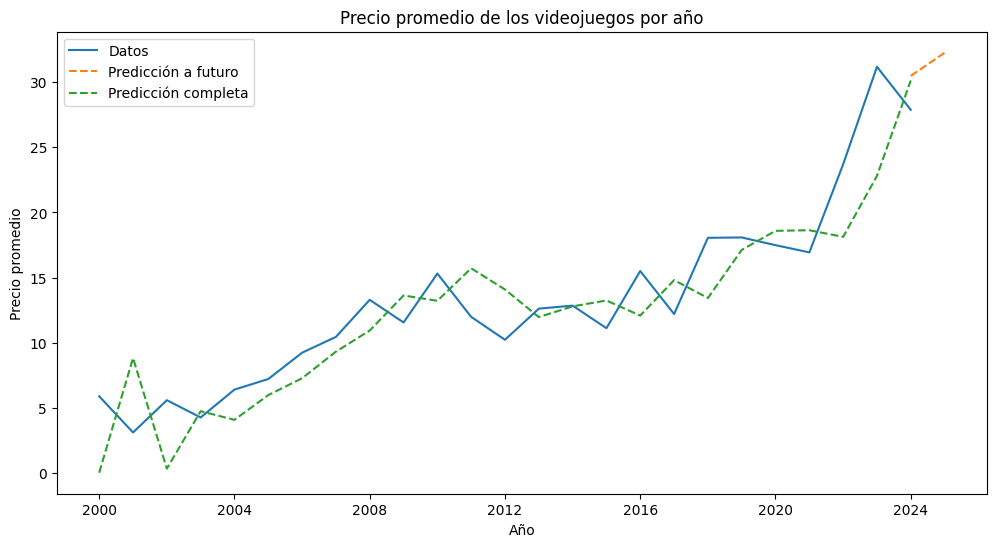

In [19]:
# Agrupar los datos por año y calcular la media de los precios
precio_anual = videogames_data.groupby('release_year')['price'].mean()

# Crear el modelo ARIMA para los datos anuales
modelo= ARIMA(precio_anual, order=(0, 2, 2))
modelo_fit = modelo.fit()

# Obtener la predicción
prediccion = modelo_fit.predict(start=len(precio_anual), end=len(precio_anual)+1, typ='levels')

# Crear un rango de fechas para la predicción (solo los próximos dos años)
fechas_pred = pd.date_range(start=str(precio_anual.index[-1]), periods=2, freq='AS')

# Obtener la predicción completa
prediccion_completa = modelo_fit.predict(start=precio_anual.index[0], end=precio_anual.index[-1], typ='levels')

# Graficar los datos originales, la predicción a futuro y la predicción completa
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(precio_anual.index, precio_anual, label='Datos')
ax.plot(fechas_pred, prediccion, label='Predicción a futuro', linestyle='--')
ax.plot(precio_anual.index, prediccion_completa, label='Predicción completa', linestyle='--')
ax.legend()
ax.set_title('Precio promedio de los videojuegos por año')
ax.set_xlabel('Año')
ax.set_ylabel('Precio promedio')
plt.show()

In [20]:
precio_anual

release_year
2000-01-01     5.873333
2001-01-01     3.093333
2002-01-01     5.574000
2003-01-01     4.245714
2004-01-01     6.386250
2005-01-01     7.201250
2006-01-01     9.222941
2007-01-01    10.435833
2008-01-01    13.284118
2009-01-01    11.545600
2010-01-01    15.303056
2011-01-01    11.976591
2012-01-01    10.215000
2013-01-01    12.607879
2014-01-01    12.840610
2015-01-01    11.103409
2016-01-01    15.498313
2017-01-01    12.192414
2018-01-01    18.051954
2019-01-01    18.078788
2020-01-01    17.486494
2021-01-01    16.931695
2022-01-01    23.703469
2023-01-01    31.192500
2024-01-01    27.890000
Name: price, dtype: float64

In [21]:
# import pickle
# from statsmodels.tsa.arima.model import ARIMAResults

# # Reemplaza 'path_to_model' con la ruta donde está guardado tu modelo ARIMA
# path_to_model = 'models\model_st_precio2.pkl'

# # Cargar el modelo
# with open(path_to_model, 'rb') as pkl:
#     model_fit = pickle.load(pkl)

# # Ver resumen del modelo
# print(model_fit.summary())

# # Ver los parámetros del modelo
# print(model_fit.params)

# # Si el modelo contiene información sobre los datos de entrenamiento, podrías intentar acceder a ella así:
# # print(model_fit.model.data.orig_endog)
# # print(model_fit.model.data.orig_exog)


                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                   25
Model:                 ARIMA(0, 2, 2)   Log Likelihood                 -59.668
Date:                Sun, 11 Feb 2024   AIC                            125.337
Time:                        21:07:43   BIC                            128.743
Sample:                    01-01-2000   HQIC                           126.193
                         - 01-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.2623      0.229     -5.502      0.000      -1.712      -0.813
ma.L2          0.3657      0.306      1.194      0.232      -0.235       0.966
sigma2         9.5300      3.170      3.006      0.0

In [21]:
# Agrupar los datos por año y calcular la media de los precios
precio_anual = videogames_data.groupby('release_year')['price'].mean()

# Crear el modelo ARIMA para los datos anuales
modelo= ARIMA(precio_anual, order=(0, 2, 2))
modelo_fit = modelo.fit()

# Obtener la predicción
prediccion = modelo_fit.predict(start=len(precio_anual), end=len(precio_anual)+1, typ='levels')

# Crear un rango de fechas para la predicción (solo los próximos dos años)
fechas_pred = pd.date_range(start=str(precio_anual.index[-1]), periods=2, freq='AS')

# Obtener la predicción completa
prediccion_completa = modelo_fit.predict(start=precio_anual.index[0], end=precio_anual.index[-1], typ='levels')

fig = go.Figure()

# Datos originales
fig.add_trace(go.Scatter(x=precio_anual.index, y=precio_anual,
                         mode='lines+markers', name='Datos'))

# Predicción a futuro
fig.add_trace(go.Scatter(x=fechas_pred, y=prediccion,
                         mode='lines', name='Predicción a futuro',
                         line=dict(dash='dash')))

# Predicción completa
fig.add_trace(go.Scatter(x=precio_anual.index, y=prediccion_completa,
                         mode='lines', name='Predicción completa',
                         line=dict(dash='dot')))

# Actualizar el diseño del gráfico
fig.update_layout(title='Precio promedio de los videojuegos por año',
                  xaxis_title='Año',
                  yaxis_title='Precio promedio',
                  legend_title='Leyenda',
                  template='plotly_dark')

# Mostrar el gráfico
fig.show()

# plotly.offline.plot(fig, filename = 'graphs/stemporal.html')

In [22]:
prediccion

2025-01-01    30.493204
2026-01-01    32.273659
Freq: AS-JAN, Name: predicted_mean, dtype: float64

In [23]:
prediccion_completa

2000-01-01     0.000000
2001-01-01     8.809990
2002-01-01     0.313511
2003-01-01     4.729241
2004-01-01     4.063678
2005-01-01     5.966929
2006-01-01     7.258692
2007-01-01     9.303317
2008-01-01    10.925568
2009-01-01    13.619877
2010-01-01    13.210835
2011-01-01    15.708661
2012-01-01    14.080456
2013-01-01    11.960377
2014-01-01    12.782377
2015-01-01    13.235661
2016-01-01    12.075454
2017-01-01    14.798094
2018-01-01    13.423854
2019-01-01    17.119596
2020-01-01    18.586655
2021-01-01    18.633343
2022-01-01    18.122416
2023-01-01    22.808630
2024-01-01    30.139899
Freq: AS-JAN, Name: predicted_mean, dtype: float64

In [24]:
precio_anual

release_year
2000-01-01     5.873333
2001-01-01     3.093333
2002-01-01     5.574000
2003-01-01     4.245714
2004-01-01     6.386250
2005-01-01     7.201250
2006-01-01     9.222941
2007-01-01    10.435833
2008-01-01    13.284118
2009-01-01    11.545600
2010-01-01    15.303056
2011-01-01    11.976591
2012-01-01    10.215000
2013-01-01    12.607879
2014-01-01    12.840610
2015-01-01    11.103409
2016-01-01    15.498313
2017-01-01    12.192414
2018-01-01    18.051954
2019-01-01    18.078788
2020-01-01    17.486494
2021-01-01    16.931695
2022-01-01    23.703469
2023-01-01    31.192500
2024-01-01    27.890000
Name: price, dtype: float64

In [28]:
# # Crear el archivo .pkl para guardar el modelo
# with open('model_st_precio2.pkl', 'wb') as archivo:
#     pickle.dump(modelo_fit, archivo)

In [25]:
videogames_data["release_year"].dtype

dtype('<M8[ns]')

In [32]:
import pandas as pd
import plotly.graph_objs as go
from statsmodels.tsa.arima.model import ARIMA

videogames_data['release_date'] = pd.to_datetime(videogames_data['release_date'])
videogames_data['release_month'] = videogames_data['release_date'].dt.strftime('%Y-%m')
videogames_data['release_month'] = pd.to_datetime(videogames_data['release_month'])
precio_mensual = videogames_data.groupby('release_month')['price'].mean()

# Ajustar modelo ARIMA y hacer predicciones 
model = ARIMA(precio_mensual, order=(0, 2, 2))
model_fit = model.fit()
prediccion = model_fit.forecast(steps=12)
fechas_futuras = pd.date_range(start=precio_mensual.index[-1], periods=12, freq='MS')
prediccion_completa = model_fit.predict(start=precio_mensual.index[0], end=precio_mensual.index[-1], typ='levels')

# Crear trazas para Plotly
trace_datos = go.Scatter(x=precio_mensual.index, y=precio_mensual, mode='lines', name='Datos')
trace_prediccion_futura = go.Scatter(x=fechas_futuras, y=prediccion, mode='lines', name='Predicción a futuro', line=dict(dash='dash'))
trace_prediccion_completa = go.Scatter(x=precio_mensual.index, y=prediccion_completa, mode='lines', name='Predicción completa', line=dict(dash='dot'))

# Crear figura y añadir trazas
fig = go.Figure(data=[trace_datos, trace_prediccion_futura, trace_prediccion_completa])

# Actualizar el layout del gráfico
fig.update_layout(title='Precio promedio de los videojuegos por mes',
                  xaxis_title='Mes',
                  yaxis_title='Precio promedio',
                  legend_title='Leyenda',
                  template='plotly_dark')

fig.show()

# plotly.offline.plot(fig, filename = 'graphs/stemporal2.html')


'graphs/stemporal2.html'

In [33]:
videogames_data.to_csv('data/videogames_serietemporal.csv', index=False)